In [1]:
#라이브러리 불러오기
import numpy as np
import pandas as np

In [2]:
3+4

7

In [2]:
#시각화용 라이브러리
#matplotlib기반의 통계 기능이 내장된 하이레벨의 시각화 라이브러리
import seaborn as sns

In [1]:
3+4

7

In [3]:
import matplotlib.pyplot as plt

In [4]:
import matplotlib.font_manager as fm
from matplotlib import rc

In [5]:
#한글 폰트 처리용
font = fm.FontProperties(fname='/System/Library/Fonts/Supplemental/AppleGothic.ttf',size=25).get_name()
rc('font',family=font)

In [6]:
#https://github.com/mwaskom/seaborn-data/blob/master/tips.csv
#자동완성 코드 : tab
df = sns.load_dataset('tips') #내장된 샘플 데이터파일 로드 => 데이터프레임으로 변환됨

In [8]:
df.shape

(244, 7)

In [9]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
df.info() #각 컬럼의 정보(NaN데이터 존재여부, 컬럼의 dType)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [11]:
#컬럼명 출력
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [12]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [16]:
#결측치 보기
df.isnull().sum() #모두 0임으로 모든 컬럼에 결측치가 없다.

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [17]:
#특정 컬럼에 결측치 여부 보기
df['tip'].isnull().sum()

0

## 판다스의 plot()함수로 시각화

<AxesSubplot:>

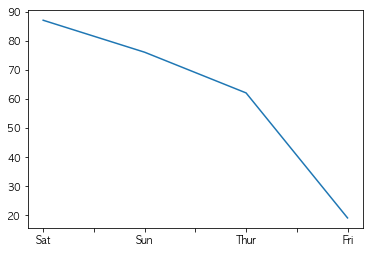

In [19]:
#day 컬럼에 요소 몇개인지 확인 value_counts()
df['day'].value_counts().plot()

<AxesSubplot:>

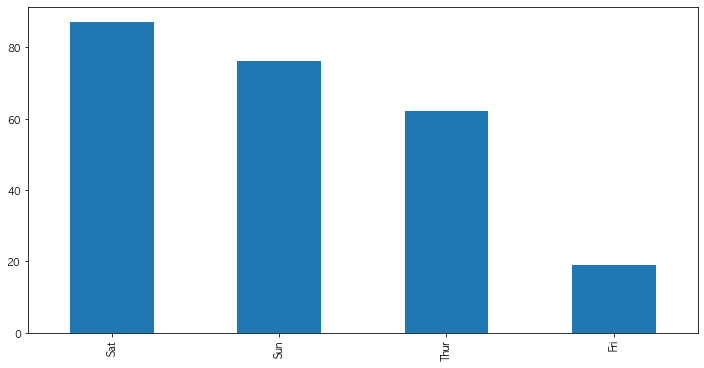

In [24]:
df['day'].value_counts().plot.bar(figsize=(12,6))

array([[<AxesSubplot:title={'center':'total_bill'}>,
        <AxesSubplot:title={'center':'tip'}>],
       [<AxesSubplot:title={'center':'size'}>, <AxesSubplot:>]],
      dtype=object)

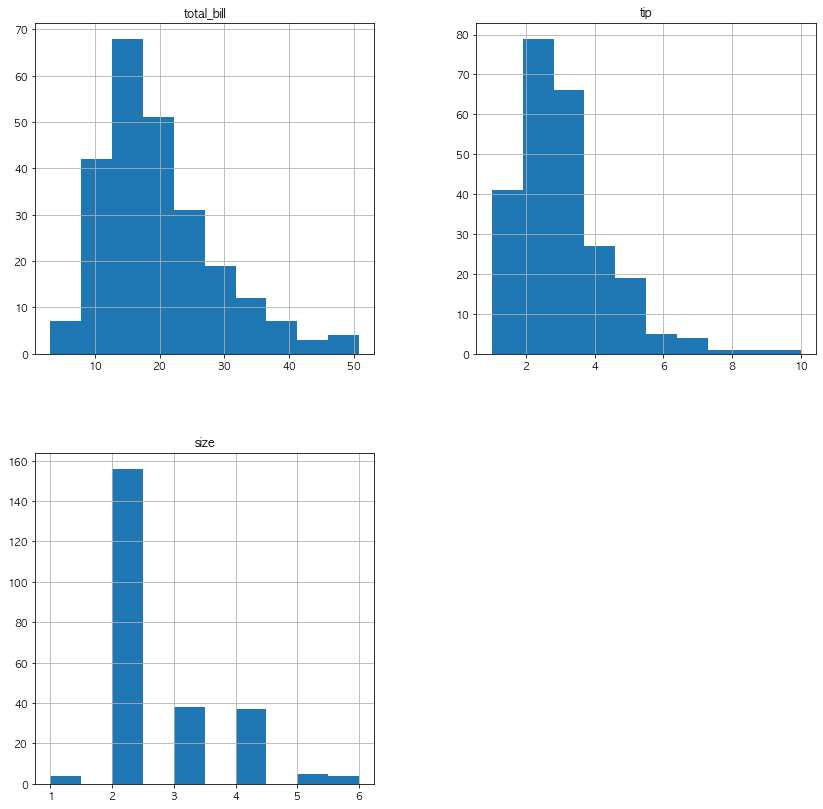

In [27]:
#100만개가 넘는 데이터를 시각화할 때는 시각화하는 속도가 느리기 때문에 grupby 또는 privot_table로
#연산을 하여 시각화하거나 필요한 데이터만 추출해서 시각화 하자
#df.plot(kind='hist') 수치형 데이터 표시
#df.plot(kind='hist') #df.plot.hist() or df.hist()
df.hist(figsize=(14,14))

<AxesSubplot:>

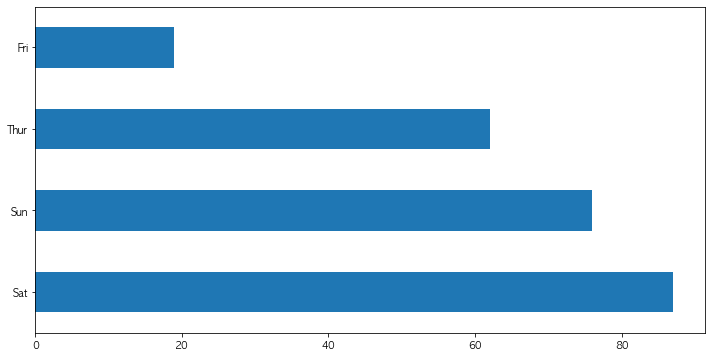

In [25]:
df['day'].value_counts().plot(figsize=(12,6),kind='barh')

array([[<AxesSubplot:title={'center':'total_bill'}>,
        <AxesSubplot:title={'center':'tip'}>]], dtype=object)

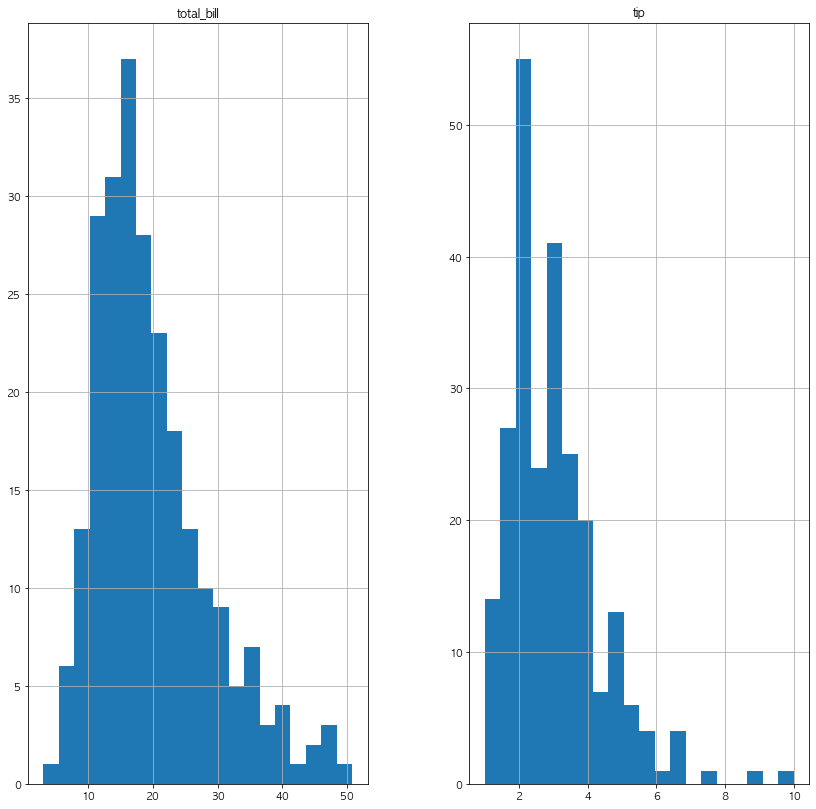

In [33]:
#슬라이싱을 해서 특정한 행, 열을 선택해서 그리기.
#total_bill컬럼과 tip컬럼만 hist그램으로 그리기(연속형의 수치 데이타임으로)
df.iloc[:,:2].hist(figsize=(14,14),bins=20)

<AxesSubplot:>

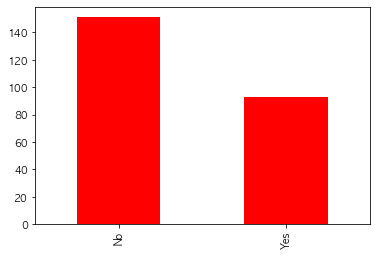

In [35]:
df['smoker'].value_counts().plot.bar(color='r') #범주형의 빈도수임으로 막대그래프

## Seaborn으로 시각화
### countplot() : 1차원 데이터이면서 범주형 데이터 시각화

### 범주형별로 빈도수를 계산해서 막대 그래프로 시각화
### x혹은 y중 하나만 지정한다.
### countplot(x='범주형 컬럼명',data=데이터프레임 혹은 시리즈) 내부적으로 지정한 컬럼에 대해 빈도수를 구한다 즉 (value_counts()를 사용할 필요가 없다.)

<AxesSubplot:title={'center':'흡연자 구성비'}, xlabel='smoker', ylabel='count'>

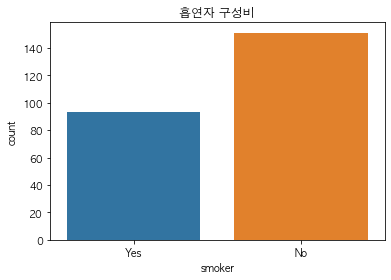

In [45]:
plt.title('흡연자 구성비')
sns.countplot(x='smoker',data=df) 
#df['smoker'].value_counts().plot.bar()

<AxesSubplot:xlabel='sex', ylabel='count'>

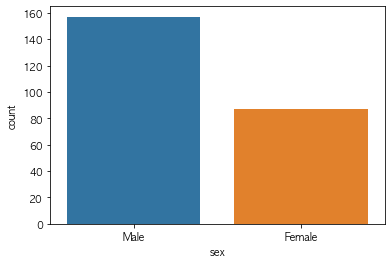

In [46]:
sns.countplot(x='sex',data=df) 

<AxesSubplot:xlabel='day', ylabel='count'>

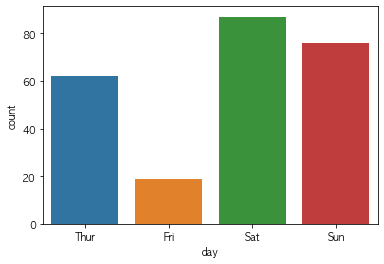

In [50]:
sns.countplot(x='day',data=df) #토요일이 지출이 가장 많았다.
#데이터프레임의 plot함수
#df['day'].value_counts().plot.bar()

<AxesSubplot:xlabel='day', ylabel='count'>

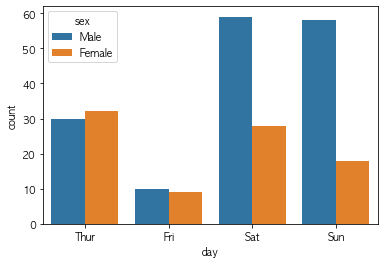

In [51]:
#hue인자에 범주형 컬럼 : 범주형 데이터별(남성,여성)로 x에 지정한 컬럼데이터별로
#빈도수를 시각화
#각 요일별 남성과 여성의 팁 지출 횟수
sns.countplot(x='day',data=df,hue='sex')